In [1]:
from lensingbiases._lensing_biases import lensingbiases as bias

In [2]:
#first we need ClTT
import os, sys
WORKING_DIR = os.path.dirname(os.path.abspath(''))
sys.path.insert(1, os.path.join(WORKING_DIR,'LensQuEst'))

In [3]:
from universe import *
from halo_fit import *
from cmb import *
from flat_map import *
from weight import *
from pn_2d import *
import pickle
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib
from tqdm import trange, tqdm

In [4]:
print("Map properties")

# number of pixels for the flat map
nX = 800
nY =800

# map dimensions in degrees
sizeX = 20.
sizeY = 20.

# basic map object
baseMap = FlatMap(nX=nX, nY=nY, sizeX=sizeX*np.pi/180., sizeY=sizeY*np.pi/180.)

# multipoles to include in the lensing reconstruction
lMin = 30.; lMax = 3.5e3

# ell bins for power spectra
nBins = 51  # number of bins
lRange = (1., 2.*lMax)  # range for power spectra

Map properties


In [5]:
# Adjust the lMin and lMax to the assumptions of the analysis
# CMB S4/SO specs
cmb = StageIVCMB(beam=1.4, noise=7., lMin=lMin, lMaxT=lMax, lMaxP=lMax, atm=False)

# Total power spectrum, for the lens reconstruction
# basiscally gets what we theoretically expect the
# power spectrum will look like
forCtotal = lambda l: cmb.ftotal(l) 

# reinterpolate: gain factor 10 in speed
L = np.logspace(np.log10(lMin/2.), np.log10(2.*lMax), 1001, 10.)
F = np.array(list(map(forCtotal, L)))
cmb.fCtotal = interp1d(L, F, kind='linear', bounds_error=False, fill_value=0.)

In [6]:
print("CMB lensing power spectrum")
u = UnivPlanck15()
halofit = Halofit(u, save=False)
w_cmblens = WeightLensSingle(u, z_source=1100., name="cmblens")
p2d_cmblens = P2dAuto(u, halofit, w_cmblens, save=False)

CMB lensing power spectrum


In [7]:
print("Gets a theoretical prediction for the noise")
fNqCmb_fft = baseMap.forecastN0Kappa(cmb.funlensedTT, cmb.fCtotal, lMin=lMin, lMax=lMax, test=False)
Ntheory = lambda l: fNqCmb_fft(l) 

Gets a theoretical prediction for the noise
computing the reconstruction noise


/home/users/delon/LensQuEst/LensQuEst/flat_map.py:1668: RuntimeWarning: divide by zero encountered in divide
  resultFourier = 1./resultFourier
/home/users/delon/LensQuEst/LensQuEst/flat_map.py:1668: RuntimeWarning: invalid value encountered in divide
  resultFourier = 1./resultFourier


In [46]:
cmb.sensitivity

0.0020362174606600512

In [8]:
ell = list([i for i in lRange])

In [9]:
lRange[1]

7000.0

In [50]:
n1 = np.loadtxt('n1_data/N1_All_analytical.dat').T

In [14]:
l_dat = n1[0]

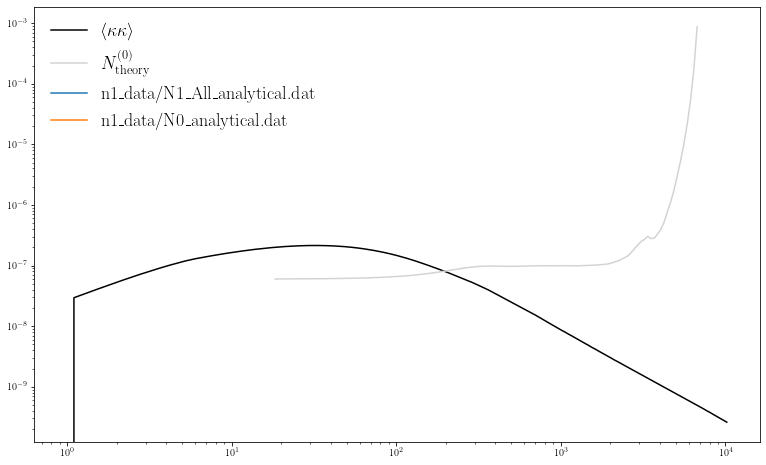

In [76]:
plt.figure(figsize=(13,8))


ell = baseMap.l.flatten()
theory=[p2d_cmblens.fPinterp, Ntheory]
theory_l=[r'$\big<\kappa\kappa\big>$', r'$N^{(0)}_{\rm theory}$']
theory_s=['black', 'lightgrey']
for f,l,sty in zip(theory, theory_l, theory_s):
    L = np.logspace(np.log10(1.), np.log10(np.max(ell)), 201, 10.)
    ClExpected = np.array(list(map(f, L)))
    plt.plot(L, ClExpected, sty, label=l)


for tmp in [
            'n1_data/N1_All_analytical.dat', 
            'n1_data/N0_analytical.dat',
]:
    asdf = np.loadtxt(tmp).T

    l_dat = asdf[0]
    phiphi = asdf[1]


    plt.plot(l_dat, phiphi, label=tmp)
plt.legend(frameon=False)
plt.xscale('log')
plt.yscale('log')

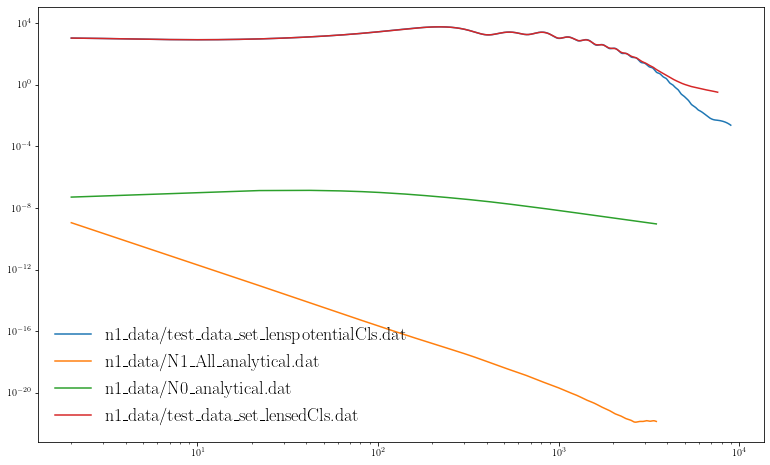

In [72]:
plt.figure(figsize=(13,8))


# ell = baseMap.l.flatten()
# theory=[p2d_cmblens.fPinterp, Ntheory]
# theory_l=[r'$\big<\kappa\kappa\big>$', r'$N^{(0)}_{\rm theory}$']
# theory_s=['black', 'lightgrey']
# for f,l,sty in zip(theory, theory_l, theory_s):
#     L = np.logspace(np.log10(1.), np.log10(np.max(ell)), 201, 10.)
#     ClExpected = np.array(list(map(f, L)))
#     plt.plot(L, ClExpected, sty, label=l)


for tmp in [
            'n1_data/test_data_set_lenspotentialCls.dat', 
            'n1_data/N1_All_analytical.dat', 
            'n1_data/N0_analytical.dat',
            'n1_data/test_data_set_lensedCls.dat'
]:
    asdf = np.loadtxt(tmp).T

    l_dat = asdf[0]
    phiphi = asdf[1]


    plt.plot(l_dat, phiphi, label=tmp)
plt.legend(frameon=False)
plt.xscale('log')
plt.yscale('log')